Project 4

# Project description  
Game sales data analysis to spot potential big winners and plan advertising campaigns. Identifying patterns that determine whether a game succeeds or not.

### Table of Contents: <a class="anchor" id="contents"></a>

#### [1. Uploading data and studying the general information](#chapter1)
   * [Conclusion](#chapter2)

#### [2. Data preprocessing](#chapter3)
   * [2.1 Processing missing values](#chapter4)  
   * [2.2 Data type replacment](#chapter5)
   * [2.3 Making calculations](#chapter6)
   * [Conclusion](#chapter7)
   
#### [3. Data analysis](#chapter8)
   * [Conclusion](#chapter9)
   
#### [4. Creating a user profile for each region](#chapter10)
   * [Conclusion](#chapter11)

#### [5. Testing hypotheses](#chapter12)
   * [Conclusion](#chapter13)

#### [Overall conclusion](#chapter14)

### 1.  Uploading data and studying the general information <a class="anchor" id="chapter1"></a>

In [3]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
#opening data files
data= pd.read_csv('games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Columns name have different case of letters.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Data type for columns 'Critic_Score' and 'User_Score' with numeric values inside are object (text).

In [9]:
missing_list=[]
for x in data:
    missing_list.append([x, data[x].isnull().sum(),(len(data[data[x].isnull()])/len(data))])
missing_list = pd.DataFrame(missing_list, columns=['column', 'amount_missing', 'missing %'])
missing_list.style.format({'missing %': "{:.2%}"}).hide_index()

column,amount_missing,missing %
Name,2,0.01%
Platform,0,0.00%
Year_of_Release,269,1.61%
Genre,2,0.01%
NA_sales,0,0.00%
EU_sales,0,0.00%
JP_sales,0,0.00%
Other_sales,0,0.00%
Critic_Score,8578,51.32%
User_Score,6701,40.09%


There are missing values in columns: 'Name', 'Year_of_Release', 'Critic_Score', 'User_Score', 'Rating'.

In [10]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [11]:
print('Number of games:', len(data.groupby('Name')))
print('Number of platforms:', len(data.groupby('Platform')))
print('Number of genres:', len(data.groupby('Genre')))
print('First year of release: {:.0f}'.format(data['Year_of_Release'].min()))
print('Last year of release: {:.0f}'.format(data['Year_of_Release'].max()))

Number of games: 11559
Number of platforms: 31
Number of genres: 12
First year of release: 1980
Last year of release: 2016


[Back to the Table of Contents](#contents)

### Conclusion <a class="anchor" id="chapter2"></a>

**In this step:**
- all libraries that we need for analysis were imported;
- data file were opened;
- data was studied.  

**I found:**
- different case of letters in column's names;
- not numeric data type for columns with numbers;
- missing values in columns.

[Back to the Table of Contents](#contents)

### 2. Data preprocessing <a class="anchor" id="chapter3"></a>

In [12]:
#changing letter case in column names
data.columns = data.columns.str.lower()

I made letters in column names lowercase.

[Back to the Table of Contents](#contents)

#### 2.1 Processing missing values <a class="anchor" id="chapter4"></a>

In [13]:
#checking rows with missing values
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
#checking rows with missing values
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


I found two rows with missing values in columns 'name' and 'genre'.  
Possible cause for missing values is corrupted data, probably some data was lost.  
I don't see any suitable replacement for these values, I will delete them.

In [15]:
#deleting missing values
data = data.drop(data[data['name'].isna()].index)
#checking result
print('Data size after deleting:', len(data))

Data size after deleting: 16713


I deleted these rows, it will not affect analysis, because it only 0.01% from all data.

In [16]:
#checking missing values
missing_years = data[data['year_of_release'].isna()].copy()
names_missing_year = missing_years['name']
missing_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Possible cause for missing values here is corrupted data, probably some data was lost.  
I found that some games with missing values in columns 'year_of_release' have year in the names.  
I assume that if year in the game name bigger or equal than 1980 and less or equal than 2016 (first and last year in our data) it can be year of release.  
Therefore I will fill some of missing values with year in the game name (if there is any), it will not affect to analysis, because percentage of all missing values in this column is 1.61%.

In [17]:
#creating helper column for importing numbers from game names
data['missing_year'] = data['name']
#importing numbers from game names
data['missing_year'] = data.missing_year.str.extract('(\d+)').astype(float)
#filling missing values
data['year_of_release'] = data['year_of_release'].mask(((data['missing_year'] >= 1980) & 
                                                        (data['missing_year'] <= 2016)), 
                                                       data['year_of_release'].fillna(data['missing_year']))
#checking result
data.query('missing_year >= 1980 & name in @names_missing_year').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,missing_year
183,Madden NFL 2004,PS2,2004.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004.0
377,FIFA Soccer 2004,PS2,2004.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004.0
452,Madden NFL 2002,PS2,2001.0,Sports,2.50,0.16,0.01,0.42,94.0,7.9,E,2002.0
475,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006.0
617,PES 2009: Pro Evolution Soccer,PS2,2008.0,Sports,0.13,0.07,0.26,2.05,NaN,NaN,NaN,2009.0


For some games I filled missing values in column 'year_of_release' with year from the game name.  
I don't see any suitable replacement for other values, I will leave them blank.

In [18]:
#deleting helper column
data = data.drop(columns=['missing_year'])
#checking result
data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16056,Drone Tactics,DS,2007.0,Strategy,0.01,0.0,0.0,0.0,74.0,7.4,E10+


I deleted helper column that I created for filling missing values.

In [19]:
missing_list.loc[8:].style.format({'missing %': "{:.2%}"}).hide_index()

column,amount_missing,missing %
Critic_Score,8578,51.32%
User_Score,6701,40.09%
Rating,6766,40.48%


In columns 'critic_score','user_score' and 'rating' there are more than 40% missing values.  
Possible causes for this can be:
- corrupted data, probably some data was lost;
- default value in database, probably these games weren't rated.  

We can't replace missing values here with mean or median, because rating can be totally different.   
I don't see any suitable replacement for other values, I will leave them blank and perfome the analysis on the rest of 50-60% of data.

**In this step:**
- for columns: 'name' and 'genre': missing values were deleted;
- for column 'year_of_release': part of missing values were filled, others were left blank;
- for columns 'critic_score','user_score' and 'rating': missing values were left blank.

[Back to the Table of Contents](#contents)

#### 2.2 Data type replacment <a class="anchor" id="chapter5"></a>

In [20]:
#changing data type
data['critic_score'] = data['critic_score'].astype(float)

I changed data type in column 'critic_score' with numeric values from object(text) to float(decimal numbers) for future calculations.

In [21]:
print('Number of "tbd" values:', data[data['user_score'] == 'tbd']['user_score'].count())
data[data['user_score'] == 'tbd'].sample(3)

Number of "tbd" values: 2424


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12932,Goosebumps: The Game,3DS,2015.0,Adventure,0.05,0.0,0.0,0.01,NaN,tbd,E10+
11955,Jimmie Johnson's Anything With an Engine,Wii,2011.0,Racing,0.07,0.0,0.0,0.00,NaN,tbd,E10+
9838,Dodge Racing: Charger vs Challenger,Wii,2009.0,Racing,0.11,0.0,0.0,0.01,NaN,tbd,E


I found that in column 'user_score' some values with text "tbd"(to be determined) this means that at the moment when data was received the score was not determined.
"tbd" values are not a numbers, we don't need them for analysis.  
As in case with missing values I don't see any suitable replacement for them.  
Therefore I will left them in it's original form.

In [22]:
#changing data type
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

I changed data type for column 'user_score', "tbd" values were replaced with "nan" automatically.

In [23]:
#checking result
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16461 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [24]:
#checking for zero values
print(data[data == 0].count())
data[data['user_score'] == 0]

name                   0
platform               0
year_of_release        0
genre                  0
na_sales            4507
eu_sales            5869
jp_sales           10513
other_sales         6600
critic_score           0
user_score             1
rating                 0
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0.0,E


I found one game with zero value in column 'user_score'.

In [25]:
#checking if this game was released on the other platforms
print('Number of these games in data:', data[data['name'] == "My Little Pony: Pinkie Pie's Party"]['name'].count())


Number of these games in data: 1


This game wasn't released on the other platforms.  
I don't see any suitable replasment for this zero value, also I don't want to delete this row, because it can lead to lose important information from the other columns.  
Therefore I will replase zero value with "NaN".

In [26]:
#replacing value
data[data['user_score'] == 0] = np.nan
#checking result
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16712 non-null object
platform           16712 non-null object
year_of_release    16460 non-null float64
genre              16712 non-null object
na_sales           16712 non-null float64
eu_sales           16712 non-null float64
jp_sales           16712 non-null float64
other_sales        16712 non-null float64
critic_score       8137 non-null float64
user_score         7589 non-null float64
rating             9948 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


**In this step:**
- for columns: 'critic_score' and 'user_score': data type was changed to float(decimal numbers);
- for column 'user_score': all text values and zero value were replaced with "NaN".

[Back to the Table of Contents](#contents)

#### 2.3 Making calculations <a class="anchor" id="chapter6"></a>

In [27]:
#making calculation
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sample(3)

,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
913,Monopoly,0.86,0.83,0.0,0.20,1.89
4377,Rock Band Country Track Pack,0.41,0.00,0.0,0.03,0.44
8131,Pro Evolution Soccer 2013,0.05,0.02,0.1,0.01,0.18


I created column 'total_sales' with the sum of sales in all regions.

In [28]:
#checking zero sales
data[data['total_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


I found that 2 games have zero values in 'total_sales' column.  
Also there are no ratings here.  
I don't see any suitable replacement for these values, I will delete these rows, it will not affect results.

In [29]:
#deleting rows
data = data.drop(data[data['total_sales'] == 0].index)
#checking result
print('Data size after deleting:', len(data))

Data size after deleting: 16711


Rows with zero sales were deleted.

**In this step:**
- column 'total_sales' with the sum of sales in all regions was created;
- zero values in column 'total_sales' were deleted.

[Back to the Table of Contents](#contents)

### Conclusion <a class="anchor" id="chapter7"></a>

**In this step:**
- column names were replaced with lowercase letters;
- missing values were defined and filled/left blank or deleted;
- zero values were replaced/deleted;
- data type were converted;
- total sales for each game for all regions were calculated.

[Back to the Table of Contents](#contents)

### 3. Data analysis <a class="anchor" id="chapter8"></a>

Number of games: 11557
First year of release: 1980
Last year of release: 2016


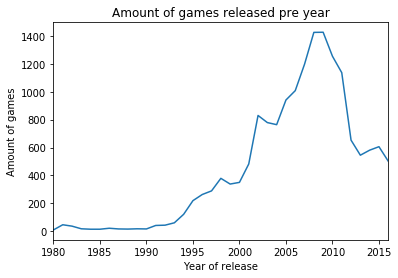

In [30]:
print('Number of games:', len(data.groupby('name')))
print('First year of release: {:.0f}'.format(data['year_of_release'].min()))
print('Last year of release: {:.0f}'.format(data['year_of_release'].max()))
#calculating released games per year
data.pivot_table(index='year_of_release', values = 'name', aggfunc=['count']).plot(legend=False)
plt.xlabel('Year of release')
plt.ylabel('Amount of games')
plt.title('Amount of games released pre year')
plt.show()

11557 games were released during considered period.  
As we can see on the graph since 1994 year the number of released games started to grow rapidly. During 2006-2011 most games were released, in 2008-2009 years amount of games are highest, then it were going down. In 2016 year number of released games slightly more than in 2001.

In [31]:
print('Number of platforms:', len(data.groupby('platform')))

Number of platforms: 31


During 1980-2016 year games were available on 31 platform.

In [32]:
data_top = data.groupby('platform').sum().sort_values('total_sales', ascending=False).head(5).reset_index()
data_top[['platform', 'total_sales']]

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,805.40


I found 5 platforms that have the highest total sales for the entire period.  
let's take a look on distribution based on total sales for each year for these platforms.

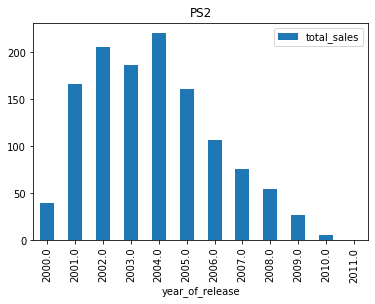

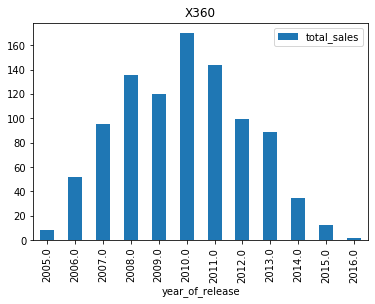

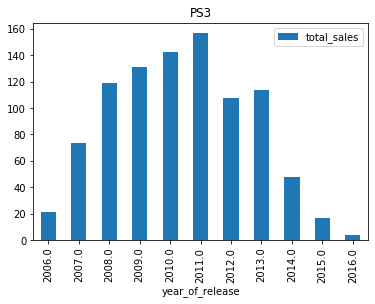

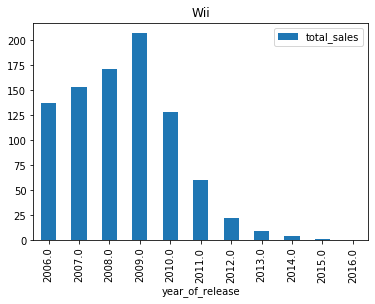

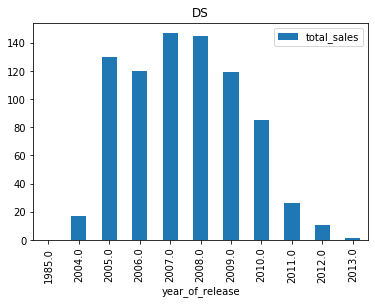

In [33]:
#building a distribution
data.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('PS2')
plt.show()
data.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('X360')
plt.show()
data.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('PS3')
plt.show()
data.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Wii')
plt.show()
data.query('platform == "DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('DS')
plt.show()

looking on distributions for each year I found:
- Sales for each platform, after reaching their highest peak, decline year after year until they reach zero sales.
- Some of top platform have no longer release games and have zero total sales in 2016 year. I assume they can be considered obsolete.

In [34]:
#grouping platform by year of release
platform_cycle = data.pivot_table(index='platform', values = 'year_of_release', aggfunc=['min', 'max'])
platform_cycle.columns = ['first_year', 'last_year']
#calculating life cycle for each platform
platform_cycle['cycle'] = platform_cycle['last_year'] - platform_cycle['first_year'] + 1
#finding average
print('Average platforms life cycle: {:.0f} years'.format(platform_cycle.query('last_year != 2016')['cycle'].mean()))
#formula for making background color in table
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]
#result
platform_cycle.query('last_year != 2016').sort_values('first_year').style.format("{:.0f}").apply(highlight_min, subset=['cycle']).apply(highlight_max, subset=['cycle'])


Average platforms life cycle: 8 years


,first_year,last_year,cycle
platform,,,
2600,1980,1989,10
NES,1983,1994,12
DS,1985,2013,29
GB,1988,2001,14
SNES,1990,1999,10
GEN,1990,1994,5
GG,1992,1992,1
NG,1993,1996,4
SCD,1993,1994,2


I took platforms that faded by 2016 year and I found their life cycle (how many years they had sales).  
3 platforms have life cycle only a year (red color), "DS" platform - 28 years(yellow color).  
In average life cycle for platforms is 8 years.

In [35]:
platform_cycle.query('last_year == 2016').sort_values('first_year').style.format("{:.0f}").apply(highlight_max, subset=['cycle'])

,first_year,last_year,cycle
platform,,,
PC,1985,2016,32
X360,2005,2016,12
PS3,2006,2016,11
Wii,2006,2016,11
3DS,2011,2016,6
PSV,2011,2016,6
WiiU,2012,2016,5
PS4,2013,2016,4
XOne,2013,2016,4


There is table with platforms that have sales in 2016 year.  
Except "PC" platform that appeared in 1985 and has sales during 32 year, oher platforms with sales in 2016 appear since 2005 year.  
Last year when the new platforms appeared is 2013.  
Therefore to equally evaluate platforms and build a prognosis for 2017 we need to take platforms with sales in 2016 and games released since 2013. 

In [36]:
#finding names of platforms with sales in 2016
active_data = data.query('year_of_release == 2016 & total_sales >0').copy()
name = active_data['platform'].unique()

In [37]:
#selecting data
new_data = data.query('platform in(@name) & year_of_release >= 2013').copy()
#changing data type
new_data['year_of_release'] = new_data['year_of_release'].astype(int)
#result
print('Number of platforms:', len(new_data.groupby('platform')))
print('Number of games:', len(new_data.groupby('name')))
print('Years: {:.0f} - {:.0f}'.format(new_data['year_of_release'].min(), new_data['year_of_release'].max()))

Number of platforms: 9
Number of games: 1210
Years: 2013 - 2016


For analysis I selected platforms without zero sales in 2016 and games released since 2013 inclusive.  
Also I changed data type for column 'year of release' to ing (integer numbers).  

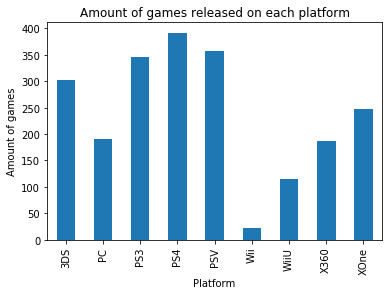

In [38]:
new_data.pivot_table(index='platform', values='name', aggfunc='count').plot(kind='bar', legend=False)
plt.xlabel('Platform')
plt.ylabel('Amount of games')
plt.title('Amount of games released on each platform')
plt.show()

Graph shows us:
- over the past 4 years the largest number of games were released for Playstation (PSV, PS3, PS4) platforms - 345+ games;
- next platform 3DS (Nintendo) - around 300 games;
- XOne - around 250 games, X360 - around 190 games (xbox); 
- next to them PC - 190 games;
- WiiU - 115 (Nintendo);
- and old Nintendo's platform Wii have lowest amount of games - around 20.

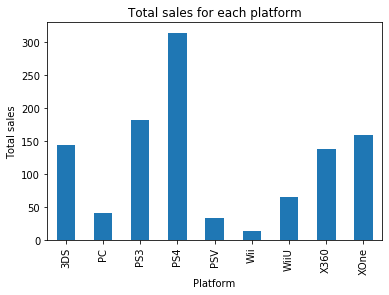

In [39]:
new_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').plot(kind='bar', legend=False)
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.title('Total sales for each platform')
plt.show()

Over the past 4 years PS4 platform has the highest profit.  
Wii platform has the lowest profit.
In most cases profit connected to the number of games that were released on platform, but for PSV and PC platform it's not. I assume that games on these platforms are cheaper in average.

In [40]:
#calculating total sales for each plrtform per year
sales_new_data = new_data.pivot_table(index= 'platform', values='total_sales', columns = 'year_of_release', aggfunc='sum')
sales_new_data.columns = ['2013', '2014', '2015', '2016']
#calculating percentage of decline sales
sales_new_data['decline %'] = (sales_new_data['2015'] - sales_new_data['2016']) / sales_new_data['2015']
#building forecast for 2017
sales_new_data['forecast_sales_2017'] = sales_new_data['2016'] - sales_new_data['2016'] * sales_new_data['decline %']
sales_new_data['decline %'] = sales_new_data['decline %'].map('{:.1%}'.format)
sales_new_data['forecast_sales_2017'] = sales_new_data['forecast_sales_2017'].map('{:.2f}'.format).astype(float)
sales_new_data.sort_values(by='forecast_sales_2017')

,2013,2014,2015,2016,decline %,forecast_sales_2017
platform,,,,,,
Wii,8.59,3.75,1.14,0.18,84.2%,0.03
X360,88.58,34.74,11.96,1.52,87.3%,0.19
PS3,113.25,47.76,16.82,3.60,78.6%,0.77
WiiU,21.65,22.03,16.35,4.60,71.9%,1.29
PSV,10.59,11.90,6.25,4.25,32.0%,2.89
PC,12.73,13.28,8.52,5.25,38.4%,3.24
3DS,56.57,43.76,27.78,15.14,45.5%,8.25
XOne,18.96,54.07,60.14,26.15,56.5%,11.37
PS4,25.99,100.00,118.90,69.25,41.8%,40.33


I calculated: 
- total sales for each platform per year (columns '2013 -2016)';
- percentage of decline sales for each platform based on data from 2015-2016 (column 'decline %');
- forecast sales for 2017 for each platform based on percentage of decline sales in 2016 (column 'forecast_sales_2017).

I found that:
- total sales for all platforms are shrinking;
- the lowest total sales and fastest decline in sales have platforms Wii, X360 and PS3 created in 2005-2006;
- platforms created in 2013 - Xone and PS4 are leading in sales in 2016;
- the slowest decline in sales have platforms PSV and PC.

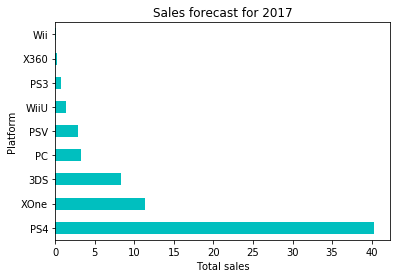

In [41]:
sales_new_data.sort_values('forecast_sales_2017', ascending=False)['forecast_sales_2017'].plot(kind='barh', color='c')
plt.xlabel('Total sales')
plt.ylabel('Platform')
plt.title('Sales forecast for 2017')
plt.show()

Based on approximate forecast for 2017:
- Wii, X360 and PS3 probably will have less that 1 million USD sales in 2017;
- WiiU, PSV and PC will have 1-5 mln USD in 2017;
- 3DS 5-10 mln USD;
- XOne 10-15 mln USD;
- PS4 - around 40 mln.

PS4, XOne and 3DS are most potentially profitable platforms for 2017.

In [42]:
new_data.query('platform == "PS4" or platform == "XOne" or platform == "3DS"').groupby('platform')['total_sales'].describe().style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.00,0.47,1.38,0.01,0.04,0.09,0.28,14.60
PS4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
XOne,247.00,0.65,1.04,0.01,0.06,0.22,0.69,7.39


PS4:
- range from 0.01 to 14.6 mln USD per game;
- average profit per game is 0.8 mln USD;
- median is 0.2 mln USD;
- standard deviation is 1.6 mln USD;

Standard deviation is twice higher than mean, spread of the data is high - there are a lot outliers.

XOne:
- range from 0.01 to 7.4 mln USD per game;
- average profit per game is 0.65 mln USD;
- median is 0.22 mln USD;
- standard deviation is 1.0 mln USD;

Standard deviation is almost twice higher than mean, spread of the data is high - there are a lot outliers.

3DS:
- range from 0.01 to 14.6 mln USD per game;
- average profit per game is 0.47 mln USD;
- median is 0.09 mln USD;
- standard deviation is 1.4 mln USD;

Standard deviation is three times higher than mean, spread of the data is very high - there are huge outliers.  

Median profit from most of the games on PS4 and XOne platforms are the same, but PS4 have highest profit from some games than XOne.  
3DS platform mostly have profit less than 0.30 mln USD, but spread of the data is so high and maxumum range is 14.6 mln USD - it means that this platform had some games that brought profit even higher than games from Xone platform.

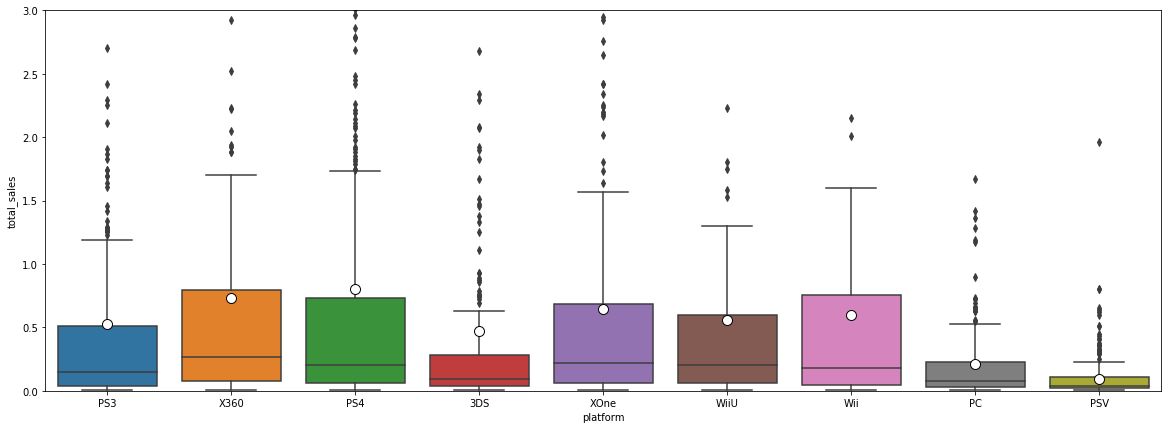

In [43]:
#bulding box plots
plt.figure(figsize=(20,7))
sns.boxplot(data=new_data, x='platform', y='total_sales', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})
plt.ylim(0, 3)
plt.show()

The lower whiskers of boxplots starts at the minimum value (0.01 mln USD) and they are close to boxs itself.    

Medians are not in the middle of box plots - distributions are not symmetrical. 

White circle on the box plots - is average sales.  
As we can see mean is close to the eng of boxes and higher tan median - it means that distributions have positive skew.

Higher whiskers are lower than maximum value, we can see outliers higher them. Also whiskers of each platforms much farther than lower whisker from the boxes - it means than distribution have tail to the right.  

Platforms PS4, X360 and XOne have highest average sales, platforms 3DS, PC and PSV have lowest average sales.

In [44]:
#finding number of scores for each platform
new_data.pivot_table(index='platform', values=['critic_score', 'user_score'], aggfunc='count')

,critic_score,user_score
platform,,
3DS,71,80
PC,150,156
PS3,121,186
PS4,252,257
PSV,77,99
Wii,0,7
WiiU,70,80
X360,81,143
XOne,169,182


PS4 platform has biggest numbers of user and critic scores.

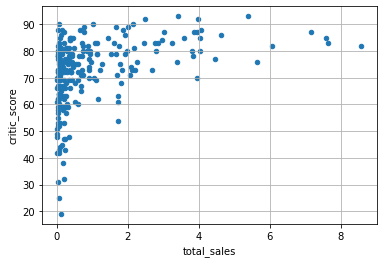

Correlation coefficient: 0.4


In [45]:
#finding correlation
PS4_data = new_data.query('platform == "PS4" & total_sales <= 10').copy()
PS4_data.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
plt.show()
#finding correlation coefficient
print('Correlation coefficient: {:.1f}'.format(PS4_data['total_sales'].corr(PS4_data['critic_score'])))

Correlation coefficient is 0.4. Correlation is positive and not a very strong, but still implies a connection. Increasing sales is accompanied by increasing the rating, but this isn't always the case.

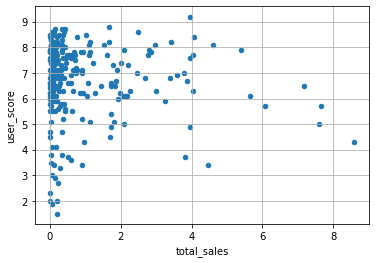

Correlation coefficient: -0.1


In [46]:
#finding correlation
PS4_data.plot(x='total_sales', y='user_score', kind='scatter', grid=True)
plt.show()
#finding correlation coefficient
print('Correlation coefficient: {:.1f}'.format(PS4_data['total_sales'].corr(PS4_data['user_score'])))

Correlation coefficient is -0.1. Correlation is negative and close to zero. Connection is practically absent.

In [47]:
#finding the most common games
common_games = new_data.groupby('name').count().sort_values('platform', ascending=False).head(5).reset_index()
common_games[['name', 'platform']]

,name,platform
0,LEGO Marvel Super Heroes,8
1,FIFA 15,8
2,LEGO The Hobbit,8
3,Lego Batman 3: Beyond Gotham,8
4,FIFA 14,8


I found 5 the most common games.

In [48]:
#comparing sales for these games
common_game_names = common_games['name']
new_data.query('name in @common_game_names').pivot_table(index='name', values='total_sales', columns='platform', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,
FIFA 14,0.23,0.40,6.46,3.01,0.41,0.38,NaN,4.22,1.16
FIFA 15,0.46,0.29,4.28,6.08,0.60,0.56,NaN,2.92,2.18
LEGO Marvel Super Heroes,0.89,0.17,1.83,1.62,0.51,NaN,0.74,2.22,1.05
LEGO The Hobbit,0.24,0.05,0.46,0.60,0.14,NaN,0.22,0.45,0.27
Lego Batman 3: Beyond Gotham,0.45,0.06,0.73,0.92,0.31,NaN,0.46,0.89,0.44


I compared the sales of the same games on different platforms. 
I found:
- sales of the same games are higher on PS3, PS4 and X360, Xone platform;
- next Nintengo platforms;
- some of the games on PSV platform have higher sales than Nintendo platforms, but moslty sales are low;
- the lowest sales have PC.

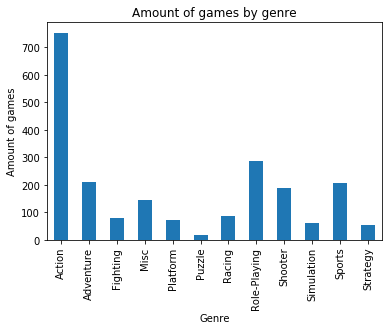

In [49]:
#finding number of games by genre
new_data.pivot_table(index='genre', values='name', aggfunc='count').plot(kind='bar', legend=False)
plt.xlabel('Genre')
plt.ylabel('Amount of games')
plt.title('Amount of games by genre')
plt.show()

Over the past 4 years most games were released in the action genre.

In [50]:
#finding total sales per genre
genre_data = data.groupby('genre').sum().sort_values('total_sales', ascending=False).reset_index()
genre_data[['genre', 'total_sales']]

,genre,total_sales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


The most profitable genres are Action, Sports and Shooter.

In [51]:
genre_data = new_data.pivot_table(index='genre', values='total_sales', columns='year_of_release', aggfunc='sum')
genre_data.columns = ['2013', '2014', '2015', '2016']
genre_data.sort_values('2016', ascending=False).style.format("{:.2f}").apply(highlight_min).apply(highlight_max)

,2013,2014,2015,2016
genre,,,,
Shooter,62.04,65.21,67.51,38.22
Action,121.70,97.15,71.90,30.11
Sports,40.54,45.06,40.84,23.49
Role-Playing,43.42,45.62,37.64,18.18
Fighting,7.07,15.85,7.90,4.47
Adventure,5.40,5.52,8.16,3.82
Platform,23.85,8.81,6.05,3.23
Racing,12.37,16.66,8.07,2.79
Misc,25.04,23.36,11.57,2.60


In 2016 year most profitable genres are the same, games in genre Shooter have highest sales (yellow color), puzzle - lowest (red color).

[Back to the Table of Contents](#contents)

### Conclusion <a class="anchor" id="chapter9"></a>

**In this step:**
- since 2009 number of released games is decreasing every year;
- average platforms life cycle is 8 years;
- 9 platforms from 31 have sales in 2016;

I analyzed data since 2013-2016 for platforms with sales in 2016 and found: 
- most games were released for playstation platforms;
- least of games were released for Wii and WiiU platforms;
- PS4 platform has the highest profit;  
- Wii platform has the lowest profit;
- PS4, XOne and 3DS are potentially profitable platforms for 2017;
- platforms PS4, X360 and XOne have highest average sales;
- platforms 3DS, PC and PSV have lowest average sales;
- critic score have small impact on sales;
- user score don't affect sales;
- the most profitable genres are Action, Sports and Shooter;
- the least profitable genres are Puzzle, Strategy and Simulation.

[Back to the Table of Contents](#contents)

### 4. Creating a user profile for each region <a class="anchor" id="chapter10"></a>

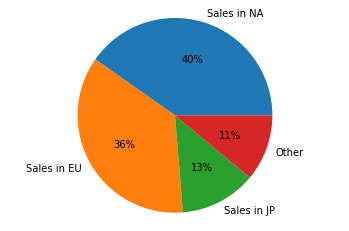

In [52]:
x = new_data['na_sales'].sum()
y = new_data['eu_sales'].sum()
z = new_data['jp_sales'].sum()
t = new_data['other_sales'].sum()
lables = ['Sales in NA', 'Sales in EU', 'Sales in JP', 'Other']
values = [x, y, z, t]
fig1, ax1 = plt.subplots()
wedges, text, autotext = ax1.pie(values, labels=lables, autopct='%1.0f%%')
ax1.axis('equal')
plt.show()

The biggest sales in North America and Europe.

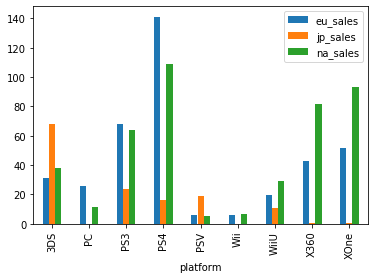

In [53]:
new_data.pivot_table(index= 'platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot(kind='bar')
plt.show()

On the past 4 years the most profitable platform are:
- North America: PS4, XOne, X360, PS3 and 3DS;
- Europe: PS4, PS3, XOne, X360 and 3DS;
- Japan: 3DS, PS3, PSV, PS4 and WiiU.

In [54]:
user_prof_platform = new_data.pivot_table(index= 'platform', values=['na_sales', 'eu_sales', 'jp_sales'], columns = 'year_of_release', aggfunc='sum')
user_prof_platform.style.format("{:.2f}").apply(highlight_min).apply(highlight_max)

Yellow color - most profitable platform  
Red color - least profitable platform  
I created table with sales for each platform per year for each region, as we can see by 2016 year situation are changed:
- the most profitable platform are:
- North America: PS4, XOne, then with a huge margin - 3DS, WiiU and PC;
- Europe: PS4, then with a huge margin - XOne, three times least profit - PC, 3DS and WiiU;
- Japan: 3DS, PS4, PSV, PS3, WiiU.

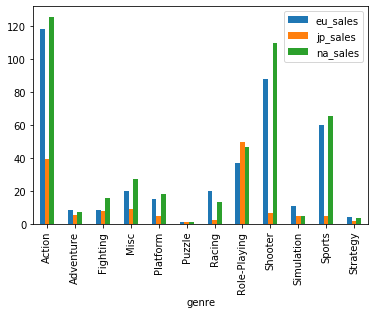

In [55]:
new_data.pivot_table(index= 'genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot(kind='bar')
plt.show()

On the past 4 years the most profitable genre are:
- North America: Action, Shooter, Sports, Role-Playing, Misc;
- Europe: Action, Shooter, Sport, Role-Playing, Misc;
- Japan: Role-Playing, Action, Misc, Fighting, Shooter.

In [56]:
user_prof_genre = new_data.query('year_of_release == 2016').pivot_table(index= 'genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
user_prof_genre.style.format("{:.2f}").apply(highlight_min).apply(highlight_max)

,eu_sales,jp_sales,na_sales
genre,,,
Action,10.68,7.07,9.29
Adventure,1.32,1.18,0.95
Fighting,1.34,0.75,1.84
Misc,0.66,1.04,0.76
Platform,1.39,0.11,1.29
Puzzle,0.01,0.00,0.00
Racing,1.77,0.01,0.73
Role-Playing,4.28,6.61,5.89
Shooter,15.90,1.06,16.24


Yellow color - most profitable platform  
Red color - least profitable platform  
I created table with sales for each genre for each region, as we can see by 2016 year situation are changed:
- the most profitable genres are:
- North America: Shooter, Action, Sports, Role-playing and Fighting; 
- Europe: Shooter, Action, Sports, Role-playing and Racing;
- Japan: Action, Role-playing, Adventure, Shooter and Misc.

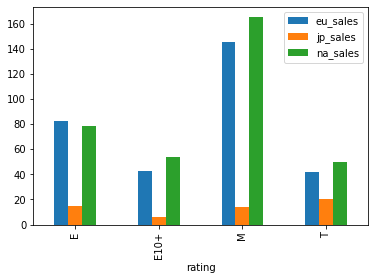

In [57]:
new_data.pivot_table(index= 'rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot(kind='bar')
plt.show()

Games with rating M (17+) are most profitable in North America and Europe, E10+ - least, difference between sales per ratings are significant.  
Games with rating T (13+) are most profitable in Japan, difference between sales per ratings are not significant.

[Back to the Table of Contents](#contents)

### Conclusion <a class="anchor" id="chapter11"></a>

**In this step I found:**
- market shares for each region;
- most profitable platforms and genre for each region;
- ESRB ratings affect sales in North America and Europe.

[Back to the Table of Contents](#contents)

### 5. Testing hypotheses <a class="anchor" id="chapter12"></a>

We need to check if the **average user ratings of the Xbox One and PC platforms are the same.**  

First I need to formulate hypotheses:  
- H0 - average user ratings of the Xbox One and PC platforms are equal;
- H1 - user ratings of the Xbox One and PC platforms are not equal.

For testing hypotheses I want to use t-test.  
**Why?**
- t-test a statistic method used to determine if there is a significant difference between the means of two groups based on a sample of data;
- t-test with two samples is commonly used with small sample sizes.  
  
**T-Test conditions and criteria:**
- the populations (where the samples come from) follow the normal distribution (normality criterion);
- the variances of the populations are also the same (variety criterion).  

In case if both criteria are True - I can use Student's t test for testing hypoteseses;  
In case if we have different variance I can use Welchh's t-test;  
In case if we have not normal distribution I can use The Mann Whitney U test, but it might be the case that sample data is large enough to apply Student's/Welch's t-test although the normality criterion is violated.  

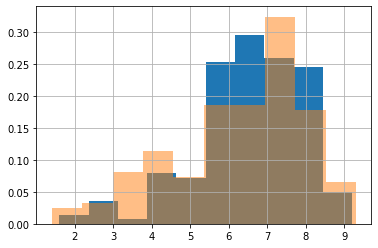

Xbox One
count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Skewness coefficient: -0.86
Variance: 1.90

PC
count    156.000000
mean       6.283974
std        1.745908
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Skewness coefficient: -0.75
Variance: 3.03


In [58]:
XOne_user_score = new_data.query('platform == "XOne" & user_score >= 0')['user_score'].copy()
PC_user_score = new_data.query('platform == "PC" & user_score >= 0')['user_score'].copy()
XOne_user_score.hist(density=True)
PC_user_score.hist(density=True, alpha=0.5)
plt.show()
print('Xbox One')
print(XOne_user_score.describe())
print()
print('Skewness coefficient: {:.2f}'.format(XOne_user_score.skew()))
print( 'Variance: {:.2f}'.format(np.var(XOne_user_score)))
print()
print('PC')
print(PC_user_score.describe())
print()
print('Skewness coefficient: {:.2f}'.format(PC_user_score.skew()))
print( 'Variance: {:.2f}'.format(np.var(PC_user_score)))

I found that in the sample's group distribution is not normal and variance is different.  
I will check the normality and variance criteria for groups in data set:

To test for normality, I will use the **Shapiro-Wilk test.**  
H0- the sample was drawn from a normal (Gaussian) distribution;  
H1- the sample wasn't drawn from a normal (Gaussian) distribution.

In [59]:
#testing hypotheses
stat, p = st.shapiro(XOne_user_score)
print('Statistics: {}, p: {}'. format(stat, p))
# interpret
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

Statistics: 0.955055296421051, p: 1.524856543255737e-05
We reject the null hypothesis


In [60]:
#testing hypotheses
stat, p = st.shapiro(PC_user_score)
print('Statistics: {}, p: {}'. format(stat, p))
# interpret
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Statistics: 0.9412239789962769, p: 4.413459919305751e-06
We reject the null hypothesis


**Conclusion:**  
Since p < alpha for sample, and p value is so small - we have high probability that the data set wasn't drawn from a normal distribution.

To test for variance, I will use **the Levene test.**  
H0- the variances of the data set are the same for both groups;  
H1- the variance of the data set are not the same.

In [61]:
#testing hypotheses
stat, p = st.levene(XOne_user_score, PC_user_score)
print('Statistics: {}, p: {}'. format(stat, p))
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

Statistics: 8.601515189469591, p: 0.0035894229358260526
We reject the null hypothesis


**Conclusion:**  
Since p < alpha, and p value is so small - we have high probability that the data sets's dispersion are not the same.

Since we found that population have different variances and not normal distributions, better to do Mann Whitney tests to check if the average user ratings of the Xbox One and PC platforms are the same.  
But I admit that it might be the case that sample data is large enough to apply Welch's t-test and as I know I this case the methods of the scipy library can make the t-distribution normal automatically.  
Therefore I will do both tests.

In [62]:
#testing hypotheses
print("Welch's test result:")

alpha = 0.05

results = st.ttest_ind(XOne_user_score, PC_user_score, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Welch's test result:
p-value: 0.17156613829336056
We can't reject the null hypothesis


In [63]:
#testing hypotheses
print("Mann Whitney's U tests result:")
alpha = 0.05

from scipy.stats import mannwhitneyu

results = mannwhitneyu(XOne_user_score, PC_user_score, alternative='two-sided')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Mann Whitney's U tests result:
p-value: 0.5655160339922649
We can't reject the null hypothesis


**Conclusion:**  
Result from both tests: We can't reject the null hypothesis.  
The p-value is big, it strongly suggests that the average user ratings of the Xbox One and PC platforms are the same.

We need to check if the **average user ratings for the Action and Sports genres are different.**  

First I need to formulate hypotheses:  
- H0 - average user ratings for the Action and Sports genres are equal  (H0 is always stated with an equal sign);
- H1 - user ratings for the Action and Sports genres are not equal (according to the task).

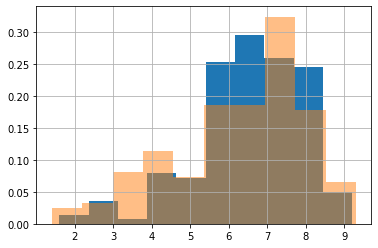

Action
count    389.000000
mean       6.847044
std        1.328794
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Skewness coefficient: -1.23
Variance: 1.76

Sports
count    159.000000
mean       5.249686
std        1.783038
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Skewness coefficient: -0.38
Variance: 3.16


In [64]:
action_user_score = new_data.query('genre == "Action" & user_score >= 0')['user_score'].copy()
sports_user_score = new_data.query('genre == "Sports" & user_score >= 0')['user_score'].copy()
XOne_user_score.hist(density=True)
PC_user_score.hist(density=True, alpha=0.5)
plt.show()
print('Action')
print(action_user_score.describe())
print()
print('Skewness coefficient: {:.2f}'.format(action_user_score.skew()))
print( 'Variance: {:.2f}'.format(np.var(action_user_score)))
print()
print('Sports')
print(sports_user_score.describe())
print()
print('Skewness coefficient: {:.2f}'.format(sports_user_score.skew()))
print( 'Variance: {:.2f}'.format(np.var(sports_user_score)))

I found that in the sample's group distribution is not normal and variance is different.  
I will check the normality and variance criteria for groups in data set:

To test for normality, I will use the **Shapiro-Wilk test.**  
H0- the sample was drawn from a normal (Gaussian) distribution;  
H1- the sample wasn't drawn from a normal (Gaussian) distribution.

In [65]:
#testing hypotheses
stat, p = st.shapiro(action_user_score)
print('Statistics: {}, p: {}'. format(stat, p))
# interpret
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

Statistics: 0.9063152074813843, p: 9.011459011995255e-15
We reject the null hypothesis


In [66]:
#testing hypotheses
stat, p = st.shapiro(sports_user_score)
print('Statistics: {}, p: {}'. format(stat, p))
# interpret
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

Statistics: 0.9811745882034302, p: 0.028929850086569786
We reject the null hypothesis


**Conclusion:**  
Since p < alpha for sample, and p value is so small - we reject H0, the data set wasn't drawn from a normal distribution.

To test for variance, I will use **the Levene test.**  
H0- the variances of the data set are the same for both groups;  
H1- the variance of the data set are not the same.

In [67]:
#testing hypotheses
stat, p = st.levene(action_user_score, sports_user_score)
print('Statistics: {}, p: {}'. format(stat, p))
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

Statistics: 25.944256045012096, p: 4.847402302472985e-07
We reject the null hypothesis


**Conclusion:**  
Since p < alpha, and p value is so small - we have high probability that the data sets's dispersion are not the same.

Since we found that population have different variances and not normal distributions, better to do Mann Whitney tests to check if the average user ratings for the Action and Sports genres are different.  
But I admit that it might be the case that sample data is large enough to apply Welch's t-test and as I know I this case the methods of the scipy library can make the t-distribution normal automatically.  
Therefore I will do both tests.

In [68]:
#testing hypotheses
print("Welch's test result:")

alpha = 0.05

results = st.ttest_ind(action_user_score, sports_user_score, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Welch's test result:
p-value: 1.9829262296274313e-20
We reject the null hypothesis


In [69]:
#testing hypotheses
print("Mann Whitney's U tests result:")
alpha = 0.05

from scipy.stats import mannwhitneyu

results = mannwhitneyu(action_user_score, sports_user_score, alternative='two-sided')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Mann Whitney's U tests result:
p-value: 1.6953572885619884e-23
We reject the null hypothesis


**Conclusion:**  
Result from both tests: We reject the null hypothesis.  
The p-value is so small, it strongly suggests that the average user ratings for the Action and Sports genres are different.

[Back to the Table of Contents](#contents)

### Conclusion <a class="anchor" id="chapter13"></a>

**In this step I found:**
- high probability that the average user ratings of the Xbox One and PC platforms are the same;
- high probability the average user ratings for the Action and Sports genres are different.

[Back to the Table of Contents](#contents)

### Overall conclusion <a class="anchor" id="chapter14"></a>

I analyzed games on 9 platform that were released 2013-2016.  
Patterns that were identified:

1. In average platforms have sales during 8 years;

---

2. Potential profitable platforms in general and per region (1-highest possible profit, 9-lowest possible profit):

| Platform  | in general | NA_region | EU_region | JP_region |
| :--- | :--- | :--- | :--- | :--- |
| PS4 | 1 | 1 | 1 | 2 |
| XOne | 2 | 2 | 2 | 6 |
| 3DS | 3 | 3 | 4 | 1 |
| PC | 4 | 5 | 3 | - |
| PSV | 5 | 8 | 8 | 3 |
| WiiU | 6 | 4 | 5 | 5 |
| PS3 | 7 | 7 | 6 | 4 |
| X360 | 8 | 6 | 7 | - |
| Wii | 9 | 9 | 9 | - |

*(-) - no sales in 2016*

---

3. Top 5 potential profitable genres in general and per region (in descending order):

    - In general: Shooter, Action, Sports, Role-playing, Fighting; 
    - North America: Shooter, Action, Sports, Role-playing, Fighting; 
    - Europe: Shooter, Action, Sports, Role-playing and Racing;
    - Japan: Action, Role-playing, Adventure, Shooter and Misc.